In [58]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv("synthetic_financial_data.csv")

In [60]:
df.head(20)

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083
5,6,1032,2021,8487.68,2023-01-01 00:00:05,1,American Express,City-1,Gas Station,43,Purchase at Merchant-2021
6,7,1029,2033,7565.30,2023-01-01 00:00:06,1,Visa,City-7,Online Shopping,19,Purchase at Merchant-2033
7,8,1018,2088,2284.88,2023-01-01 00:00:07,0,American Express,City-46,Travel,40,Purchase at Merchant-2088
8,9,1095,2077,3952.73,2023-01-01 00:00:08,0,American Express,City-45,Groceries,43,Purchase at Merchant-2077
9,10,1014,2031,8362.04,2023-01-01 00:00:09,0,Visa,City-25,Restaurant,55,Purchase at Merchant-2031


In [61]:
df.shape

(10000, 11)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [63]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])  # Mengubah kolom menjadi tipe data datetime64

# Mengubah format waktu
df['transaction_time'] = df['transaction_time'].dt.strftime('%H:%M:%S')

df['transaction_time'] = df['transaction_time'].str.replace(':', '')
df['transaction_time'] = df['transaction_time'].astype("int64")

In [64]:
df.tail(2)

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
9998,9999,1009,2019,2837.13,24638,1,Visa,City-11,Retail,57,Purchase at Merchant-2019
9999,10000,1082,2070,7209.43,24639,1,Discover,City-1,Gas Station,50,Purchase at Merchant-2070


In [65]:
df.corr()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,customer_age
transaction_id,1.000000,0.000594,0.006066,-0.004468,0.990450,0.001991,0.004851
customer_id,0.000594,1.000000,0.020525,-0.012893,0.000053,-0.005981,-0.015335
merchant_id,0.006066,0.020525,1.000000,-0.004332,0.005742,0.016277,0.012120
amount,-0.004468,-0.012893,-0.004332,1.000000,-0.002959,0.005155,-0.000658
transaction_time,0.990450,0.000053,0.005742,-0.002959,1.000000,0.001058,0.005561
is_fraudulent,0.001991,-0.005981,0.016277,0.005155,0.001058,1.000000,-0.005388
customer_age,0.004851,-0.015335,0.012120,-0.000658,0.005561,-0.005388,1.000000


<h3><b>Preprocessing

<h5><b>Missing Value

In [66]:
# Pemeriksaan nilai hilang
missing_data = df.isnull()  # atau bisa juga menggunakan data.isna()

# Menghitung nilai hilang dalam setiap kolom
missing_count = missing_data.sum()

missing_count

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

<h5><b>Drop fitur tidak perlu

In [67]:
df.drop(columns=["transaction_id","customer_id","merchant_id"], inplace=True)

In [68]:
df.corr()

,amount,transaction_time,is_fraudulent,customer_age
amount,1.000000,-0.002959,0.005155,-0.000658
transaction_time,-0.002959,1.000000,0.001058,0.005561
is_fraudulent,0.005155,0.001058,1.000000,-0.005388
customer_age,-0.000658,0.005561,-0.005388,1.000000


<h5><b>Transform

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan LabelEncoder pada kolom 'pendidikan'
df['card_type_encode'] = label_encoder.fit_transform(df['card_type'])
df['purchase_category_encode'] = label_encoder.fit_transform(df['purchase_category'])
df['location_encode'] = label_encoder.fit_transform(df['location'])

# Mengubah tipe data menjadi int64
df['card_type_encode'] = df['card_type_encode'].astype('int64')
df['purchase_category_encode'] = df['purchase_category_encode'].astype('int64')
df['location_encode'] = df['location_encode'].astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amount                    10000 non-null  float64
 1   transaction_time          10000 non-null  int64  
 2   is_fraudulent             10000 non-null  int64  
 3   card_type                 10000 non-null  object 
 4   location                  10000 non-null  object 
 5   purchase_category         10000 non-null  object 
 6   customer_age              10000 non-null  int64  
 7   transaction_description   10000 non-null  object 
 8   card_type_encode          10000 non-null  int64  
 9   purchase_category_encode  10000 non-null  int64  
 10  location_encode           10000 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 859.5+ KB


<h5><b>Fitur Scale

In [ ]:
kolom = df.columns 
for i in range(len(kolom)) :
    if (df[kolom[i]].dtype == 'int64' or df[kolom[i]].dtype == 'float64' or df[kolom[i]].dtype == 'datetime64[ns]') and kolom[i] != "is_fraudulent":
        if kolom[i] != "amount" :
            # Jika datanya interval atau ratio
            min_a = df[kolom[i]].min()
            max_a = df[kolom[i]].max()
            max_b = 1
            min_b = 0
            df[kolom[i]] = ((df[kolom[i]] - min_a) / (max_a - min_a)) * (max_b - min_b) + min_b


In [ ]:
df

,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description,card_type_encode,purchase_category_encode,location_encode
0,5758.59,0.000000,0,MasterCard,City-30,Gas Station,0.480769,Purchase at Merchant-2027,0.666667,0.0,0.469388
1,1901.56,0.000041,1,Visa,City-47,Online Shopping,0.826923,Purchase at Merchant-2053,1.000000,0.4,0.836735
2,1248.86,0.000081,1,MasterCard,City-6,Gas Station,0.750000,Purchase at Merchant-2035,0.666667,0.0,0.938776
3,7619.05,0.000122,1,Discover,City-6,Travel,0.788462,Purchase at Merchant-2037,0.333333,1.0,0.938776
4,1890.10,0.000162,1,MasterCard,City-34,Retail,0.346154,Purchase at Merchant-2083,0.666667,0.8,0.551020
...,...,...,...,...,...,...,...,...,...,...,...
9995,8935.28,0.999838,1,MasterCard,City-39,Restaurant,0.346154,Purchase at Merchant-2023,0.666667,0.6,0.653061
9996,30.15,0.999878,0,MasterCard,City-32,Retail,0.461538,Purchase at Merchant-2026,0.666667,0.8,0.510204
9997,6333.64,0.999919,0,American Express,City-1,Online Shopping,0.346154,Purchase at Merchant-2034,0.000000,0.4,0.000000
9998,2837.13,0.999959,1,Visa,City-11,Retail,0.750000,Purchase at Merchant-2019,1.000000,0.8,0.040816


In [ ]:
df_ready = pd.DataFrame({"amount" : df['amount'], "transaction_time" : df['transaction_time'], "location_encode" : df['location_encode'], 
                         "customer_age" : df['customer_age'], "card_type_encode" : df['card_type_encode'], 
                         "purchase_category_encode" : df['purchase_category_encode'], 
                         "is_fraudulent" : df['is_fraudulent']})

df_ready

,amount,transaction_time,location_encode,customer_age,card_type_encode,purchase_category_encode,is_fraudulent
0,5758.59,0.000000,0.469388,0.480769,0.666667,0.0,0
1,1901.56,0.000041,0.836735,0.826923,1.000000,0.4,1
2,1248.86,0.000081,0.938776,0.750000,0.666667,0.0,1
3,7619.05,0.000122,0.938776,0.788462,0.333333,1.0,1
4,1890.10,0.000162,0.551020,0.346154,0.666667,0.8,1
...,...,...,...,...,...,...,...
9995,8935.28,0.999838,0.653061,0.346154,0.666667,0.6,1
9996,30.15,0.999878,0.510204,0.461538,0.666667,0.8,0
9997,6333.64,0.999919,0.000000,0.346154,0.000000,0.4,0
9998,2837.13,0.999959,0.040816,0.750000,1.000000,0.8,1


In [ ]:
df_ready.corr()

,amount,transaction_time,location_encode,customer_age,card_type_encode,purchase_category_encode,is_fraudulent
amount,1.000000,-0.002959,0.002642,-0.000658,0.003437,-0.005608,0.005155
transaction_time,-0.002959,1.000000,-0.000340,0.005561,0.007230,-0.006728,0.001058
location_encode,0.002642,-0.000340,1.000000,-0.016858,0.008095,-0.020615,-0.002670
customer_age,-0.000658,0.005561,-0.016858,1.000000,-0.007052,0.011902,-0.005388
card_type_encode,0.003437,0.007230,0.008095,-0.007052,1.000000,-0.011357,0.012789
purchase_category_encode,-0.005608,-0.006728,-0.020615,0.011902,-0.011357,1.000000,-0.014836
is_fraudulent,0.005155,0.001058,-0.002670,-0.005388,0.012789,-0.014836,1.000000


<h5><b>Pearson Correlation

In [ ]:
import scipy.stats

# Menghitung korelasi Pearson
correlations = df_ready.corr()
correlation_with_target = correlations['is_fraudulent']

correlation_with_target

amount                      0.005155
transaction_time            0.001058
location_encode            -0.002670
customer_age               -0.005388
card_type_encode            0.012789
purchase_category_encode   -0.014836
is_fraudulent               1.000000
Name: is_fraudulent, dtype: float64

Fraudulent Cases: 5068
Valid Transactions: 4932
Proportion of Fraudulent Cases: 0.5068


<AxesSubplot: ylabel=' '>

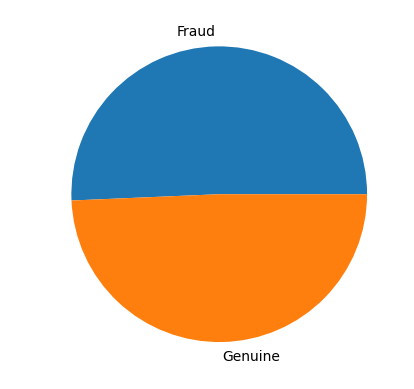

In [ ]:
import numpy as np

# check for relative proportion 
print("Fraudulent Cases: " + str(len(df_ready[df_ready["is_fraudulent"] == 1])))
print("Valid Transactions: " + str(len(df_ready[df_ready["is_fraudulent"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(df_ready[df_ready["is_fraudulent"] == 1])/ df_ready.shape[0]))

# To see how small are the number of Fraud transactions
data_p = df_ready.copy()
data_p[" "] = np.where(data_p["is_fraudulent"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

In [ ]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amount                    10000 non-null  float64
 1   transaction_time          10000 non-null  float64
 2   location_encode           10000 non-null  float64
 3   customer_age              10000 non-null  float64
 4   card_type_encode          10000 non-null  float64
 5   purchase_category_encode  10000 non-null  float64
 6   is_fraudulent             10000 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


In [ ]:
print("Average Amount in a Fraudulent Transaction: " + str(df_ready[df_ready["is_fraudulent"] == 1]["amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(df_ready[df_ready["is_fraudulent"] == 0]["amount"].mean()))

Average Amount in a Fraudulent Transaction: 4973.127156669298
Average Amount in a Valid Transaction: 4943.229468775345


In [ ]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(df_ready["amount"].describe())

Summary of the feature - Amount
-------------------------------
count    10000.000000
mean      4958.381617
std       2899.699675
min         10.610000
25%       2438.175000
50%       4943.945000
75%       7499.312500
max       9999.750000
Name: amount, dtype: float64


In [ ]:
# Separate response and features  Undersampling before cross validation will lead to overfiting
y = df_ready["is_fraudulent"] # target 
X = df_ready.iloc[:,0:6]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 6), (2000, 6), (8000,), (2000,))

In [ ]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [ ]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE. 
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fit and predict
rfc = KNeighborsClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.503
The precision is 0.5199600798403193
The recall is 0.5038684719535783
The F1 score is 0.5117878192534381


In [ ]:
# new_prediction = rfc.predict([[50.0,2.849223,0.836735,0.461538,1.0,0.2]])
new_prediction = rfc.predict([[2123.0,0.81992,0.469388,0.461538,0.666667,0.0]])

# Menampilkan hasil prediksi
print("Prediction for new data:", new_prediction)

Prediction for new data: [1]


In [ ]:
import pickle

# Save the trained model to a pickle file
with open('fraud_model.pkl', 'wb') as model_file:
    pickle.dump(rfc, model_file)